# Linear Regression Project

## Problem
Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

This is mock data - there are no real emails or addresses.

## Understanding the Data
We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# to allow the output of plotting commands to be displayed inline
%matplotlib inline
# to allow for faster tab autocomplete usage
%config Completer.use_jedi = False

ecommerce_data = pd.read_csv('Ecommerce Customers')

In [2]:
ecommerce_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
ecommerce_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

In [5]:
# set global styling
sns.set_style('whitegrid')
sns.set_palette('YlGnBu_r', 3)

Text(0.5, 1.03, 'Time on Website vs. Yearly Amount Spent')

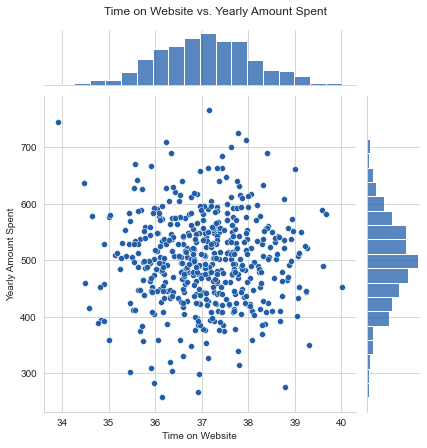

In [6]:
p = sns.jointplot(data=ecommerce_data, x='Time on Website', y='Yearly Amount Spent')
p.fig.suptitle('Time on Website vs. Yearly Amount Spent', y=1.03, fontsize = 12)

There does not seem to be a correlation between these two features.

Text(0.5, 1.03, 'Time on App vs. Yearly Amount Spent')

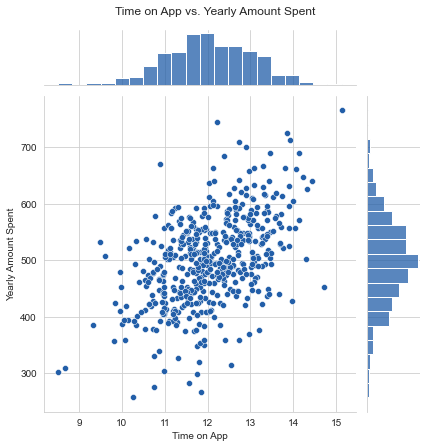

In [7]:
p = sns.jointplot(data=ecommerce_data, x='Time on App', y='Yearly Amount Spent')
p.fig.suptitle('Time on App vs. Yearly Amount Spent', y=1.03, fontsize = 12)

There seems to be a stronger correlation here compared to Time on Website vs. Yearly Amoount Spent.   
The more time spent on app, the greater the yearly amount spent.

Text(0.5, 1.03, 'Time on App vs. Length of Membership')

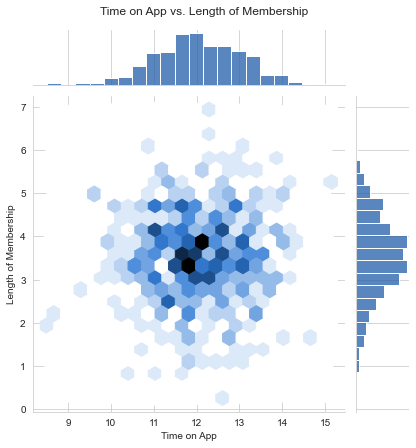

In [8]:
p = sns.jointplot(data=ecommerce_data, x='Time on App', y='Length of Membership', kind='hex')
p.fig.suptitle('Time on App vs. Length of Membership', y=1.03, fontsize = 12)

There does not seem to be a correlation between these two features.

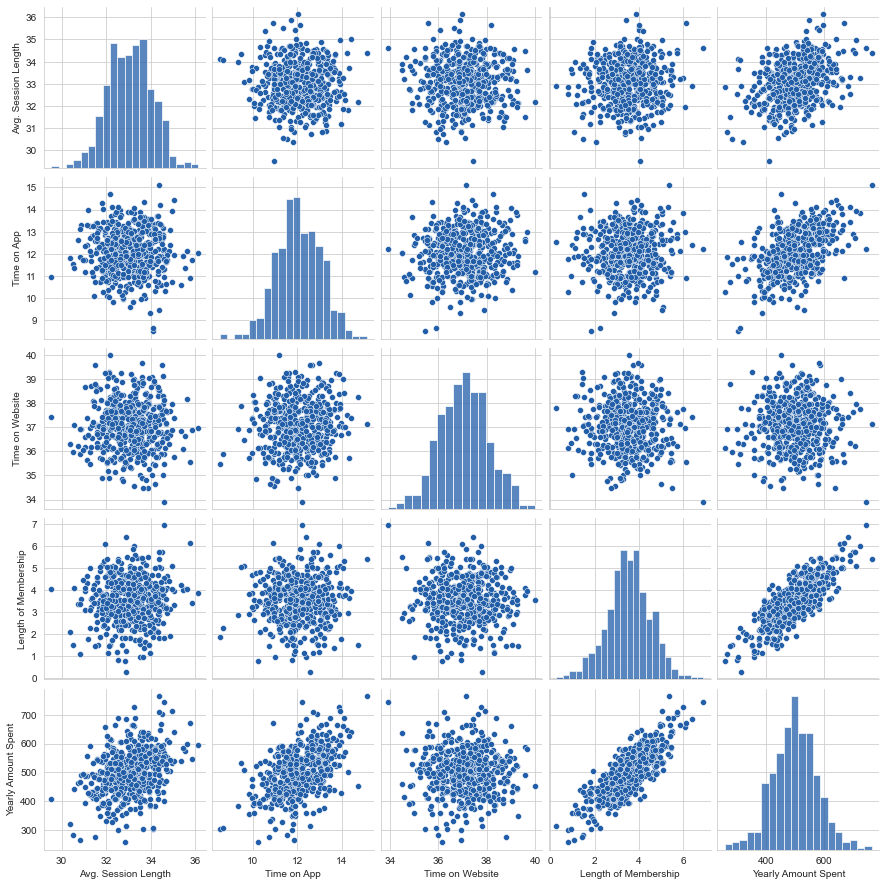

In [9]:
sns.pairplot(data=ecommerce_data)

Length of Membership looks to be the most correlated feature with Yearly Amount Spent.

In [10]:
print('Feature Correlation Table:')
ecommerce_data.corr()

Feature Correlation Table:


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


Text(0.5, 1.03, 'Feature Correlation Heatmap')

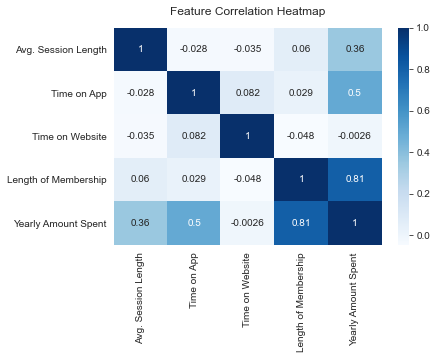

In [11]:
sns.heatmap(ecommerce_data.corr(), annot=True, cmap='Blues')
plt.title('Feature Correlation Heatmap', y=1.03, fontsize = 12)

Text(0.5, 1.0, 'Yearly Amount Spent vs. Length of Membership')

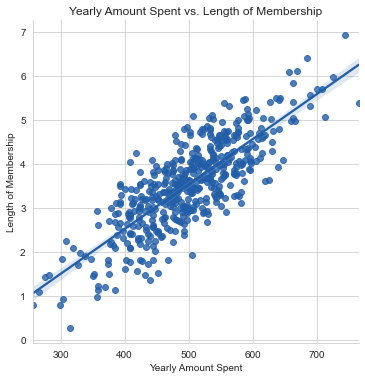

In [12]:
sns.lmplot(data=ecommerce_data, x='Yearly Amount Spent', y='Length of Membership')
plt.title('Yearly Amount Spent vs. Length of Membership', fontsize=12)

Based on the above graphs, we can confirm that Length of Membership and Yearly Amount Spent have the highest correlation. Since this data is clearly linear, we will choose a linear model to represent it and train the algorithm to predict Yearly Amount Spent.

## Model Training

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# splitting data into training set (70%) and testing set (30%)
X = ecommerce_data[['Avg. Session Length', 'Time on App', 'Time on Website', 
                    'Length of Membership']]

y = ecommerce_data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# fitting training data to linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Model Testing

In [14]:
# predicting Yearly Amount Spent using test data
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Yearly Amount Spent: Actual vs. Predicted')

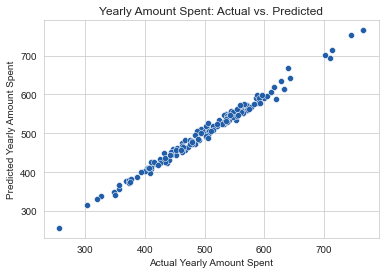

In [15]:
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Yearly Amount Spent: Actual vs. Predicted', fontsize=12)

Visually, this looks like a good model with very little noise and no outliers.

## Model Evaluation

In [16]:
# evaluating error metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430847
MSE: 79.81305165097474
RMSE: 8.93381506697865


By analyzing the root mean squared error, I would conclude that this is a very good error margin at +/-\\$8 on an average of \\$499 when looking an annual amount spent. This comes out to be a 1.6%.

Text(0.5, 1.0, 'Residuals')

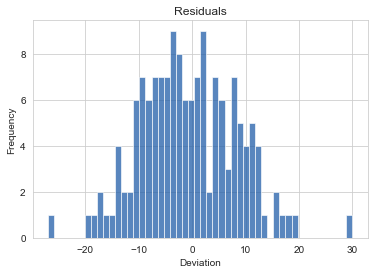

In [17]:
sns.histplot(y_test - predictions, bins=50)
plt.xlabel('Deviation')
plt.ylabel('Frequency')
plt.title('Residuals', fontsize=12)

Residuals are normally distributed around zero as desired

## Conclusion

We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development?

In [18]:
print('Yearly Amount Spent Correlations:')
pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

Yearly Amount Spent Correlations:


,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Between Time on App and Time on Website, Time on App is more strongly correlated to Yearly Amount Spent.    
Holding all else constant, for each unit increase on Time on App, there will be a \\$39 increase in Yearly Amount Spent on average.    
Whereas, for each unit increase on Time on Website, there will only be $19 increase in Yearly Amount Spent on average.    

As we have discovered, the most strongly correlated feature to Yearly Amount Spent is actually Length of Membership. Further analysis will be needed on the relationship between Length of Membership and each one of Time on App and Time on Website which I will not continute to explore in this project as my focus is on Linear Regression.

You could argue that since the app should be focused on as it is currently impacting revenue more OR you could also say that the website must be worked on in order to catch up to the app.

Deciding which platform to focus efforts on will ultimately come down the costs associated with each platform and the amount of improvements that can be realistically be made to each one in a given time.